#### Imports

In [4]:
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

x_symbol = Symbol('x')

#### Functions

In [40]:
f = [
  lambda x: np.power(x,10) - 1, 
  lambda x: np.exp(x) - 3 * x, 
  lambda x: np.power(x,3) - (9 * x) + 5,
  lambda x: 2 * np.power(x,3) + (5 * np.power(x,2)) - (8 * x) - 1,
  lambda x: 3 * np.power(x,2) - 9,
  lambda x: np.power(x,3) - (9 * x) + 3,
  lambda x: np.power(x,2) + x - 6
  ]


In [39]:
def f0(x):
  return np.power(x,10) - 1

def f1(x):
  return np.exp(x) - 3 * x

def f2(x):
  return np.power(x,3) - (9 * x) + 5

def f5(x):
  return np.power(x,3) - (9 * x) + 3

def f6(x):
  return np.power(x,2) + x - 6

##### Auxiliar Function

In [7]:
def plot_func(f, x_min, x_max, n, points):
  x = np.linspace(x_min, x_max, n)
  y = np.array([f(i) for i in x])
  plt.figure(dpi=200)
  plt.plot(x, y)
  plt.plot(points.iloc[:, 0], points.iloc[:, 1], 'ro')
  plt.grid(True)
  plt.show()

def eval_derivate(f, x):
  return float(diff(f(x_symbol), x_symbol).subs(x_symbol, x))

#### Root-finding algorithms

##### Bissection Method

In [2]:
def bissec(a, b, precision, iterations, f):

  if f(a) * f(b) >= 0:
    print('Invalid interval')
    return None
  
  k = 1
  M = f(a)
  x = (a + b) / 2

  initial_data = {'a': a, 'b': b, 'x': x, 'f(x)': f(x), 'f(a)': M, 'f(a)*f(x)': f(a)*f(x)}
  df = pd.DataFrame(initial_data, index=[1])

  while k < iterations and abs(f(x)) > precision:
    if M * f(x) > 0:
      a = x
      M = f(a)
    else:
      b = x

    x = (a + b) / 2
    df = df.append({'a': a, 'b': b, 'x': x, 'f(x)': f(x), 'f(a)': f(a), 'f(a)*f(x)': f(a)*f(x)}, ignore_index=True)

    k += 1

  print(f'Root: {round(x, 4)}, f(x): {round(f(x), 4)}, Iterations: {k}')

  plot_func(f, df['a'][0], df['b'][0], 100, df[['x', 'f(x)']])

  return df

 

##### False Position Method

In [5]:
def false_position(a, b, precision, iterations, f):

  if f(a) * f(b) >= 0:
    print('Invalid interval')
    return None
  
  k = 1
  M = f(a)
  x = (a * f(b)) - (b * f(a)) / (f(b) - f(a))

  initial_data = {'a': a, 'b': b, 'x': x, 'f(x)': f(x)}
  df = pd.DataFrame(initial_data, index=[1])

  while k < iterations and abs(f(x)) > precision:
    if M * f(x) > 0:
      a = x
      M = f(a)
    else:
      b = x

    x = a * f(b) - b * f(a) / (f(b) - f(a))
    df = df.append({'a': a, 'b': b, 'x': x, 'f(x)': f(x)}, ignore_index=True)

    k += 1
  
  print(f'Root: {round(x, 4)}, f(x): {round(f(x), 4)}, Iterations: {k}')

  plot_func(f, df['a'][0], df['b'][0], 100, df[['x', 'f(x)']])
  
  return df

##### Newton Raphson

In [135]:
def newton_raphson(x0, precision, iterations, f, x_min, x_max):
  initial_data = {'x(n)': x0, 'f(x(n))': f(x0)}
  df = pd.DataFrame(initial_data, index=[1])
  
  if abs(f(x0)) < precision:
    return df

  x = x0 - f(x0) / eval_derivate(f, x0)
  df = df.append({'x(n)': x, 'f(x(n))': f(x)}, ignore_index=True)

  k = 1

  while k < iterations and abs(f(x)) > precision:
    x = x - f(x) / eval_derivate(f, x0)
    df = df.append({'x(n)': x, 'f(x(n))': f(x)}, ignore_index=True)
    k += 1
  
  print(f'Root: {round(x, 4)}, f(x): {round(f(x), 4)}, Iterations: {k}')

  plot_func(f, x_min, x_max, 100, df.iloc[:, [0, 1]])
  
  return df

In [50]:
def secant(x0, x1, precision, iterations, f, x_min, x_max):
  initial_data = {'x(n)': x0, 'f(x(n))': f(x0)}

  df = pd.DataFrame(initial_data, index=[1])
  df = df.append({'x(n)': x1, 'f(x(n))': f(x1)}, ignore_index=True)
  
  if abs(f(x0)) < precision or abs(f(x1)) < precision:
    return df

  x = x1 - ((f(x1) * (x1 - x0)) / (f(x1) - f(x0)))

  df = df.append({'x(n)': x, 'f(x(n))': f(x)}, ignore_index=True)

  k = 1

  while k < iterations and abs(f(x)) > precision:
    x0 = x1
    x1 = x

    x = x1 - ((f(x1) * (x1 - x0)) / (f(x1) - f(x0)))
    df = df.append({'x(n)': x, 'f(x(n))': f(x)}, ignore_index=True)
    k += 1
  
  print(f'Root: {round(x, 4)}, f(x): {round(f(x), 4)}, Iterations: {k}')

  plot_func(f, x_min, x_max, 100, df.iloc[:, [0, 1]])
  
  return df

#### Results

In [ ]:
bissec(0, 1, 0.01, 5, f[2])

In [ ]:
newton_raphson(0.75, 0.01, 5, f5, 0.25, 0.75)

Root: -23.5664, f(x): 525.8091, Iterations: 5


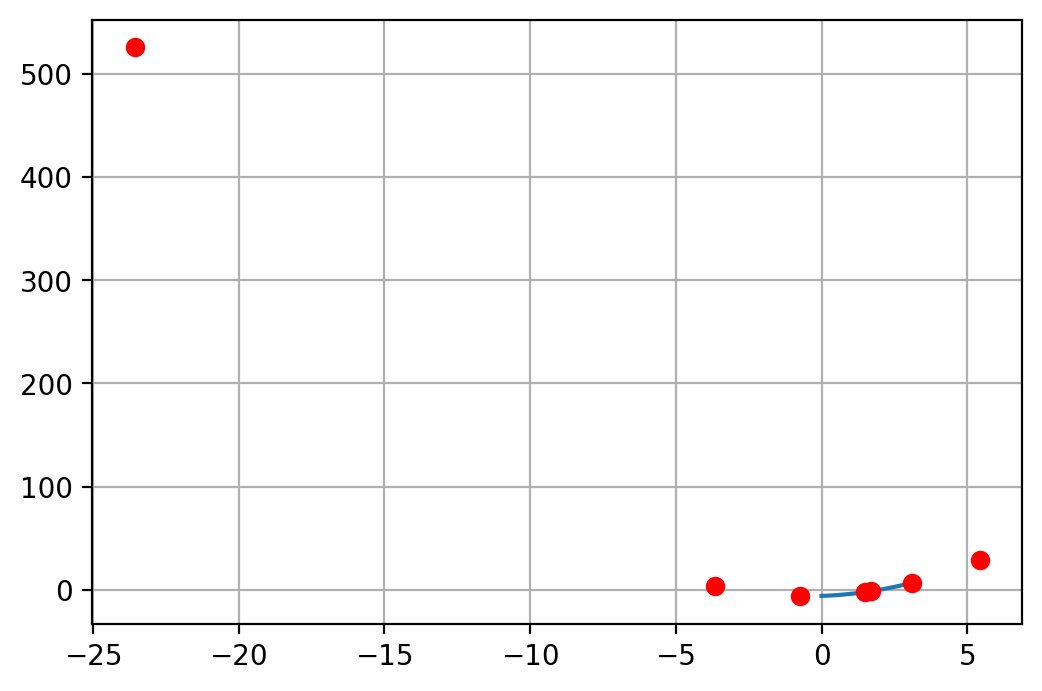

,x(n),f(x(n))
0,1.500000,-2.250000
1,1.700000,-1.410000
2,-0.750000,-6.187500
3,3.110000,6.782100
4,5.437500,29.003906
5,-3.672100,3.812218
6,-23.566406,525.809097


In [51]:
secant(1.5, 1.7, 0.01, 5, f[6], 0, 3)

In [42]:
f[6](1.5) * (1.7 - 1.5) / f[6](1.7) - f[6](1.5)

2.5691489361702127

In [53]:
res1 = f[6](1.5)
res2 = f[6](1.7)

x1_x0 = 1.7 - 1.5

fx1_fx0 = res2 - res1

fx1_fx0

1.7 - (res2 * x1_x0) / fx1_fx0

1.7 - ((f[6](1.7) * (1.7 - 1.5)) / (f[6](1.7) - f[6](1.5)))

2.0357142857142856

Root: -0.0002, Iterations: 4


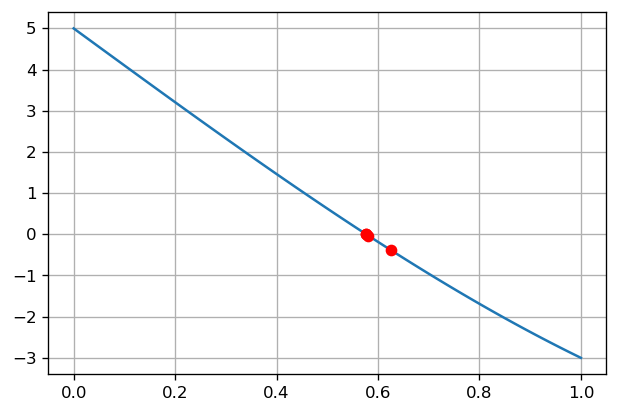

,a,b,x,f(x)
0,0.0,1.000000,0.625000,-0.380859
1,0.0,0.625000,0.580762,-0.030978
2,0.0,0.580762,0.577186,-0.002390
3,0.0,0.577186,0.576910,-0.000184


In [147]:
false_position(0, 1, 0.0005, 5, f[2])

Root: 120.5802, Iterations: 5


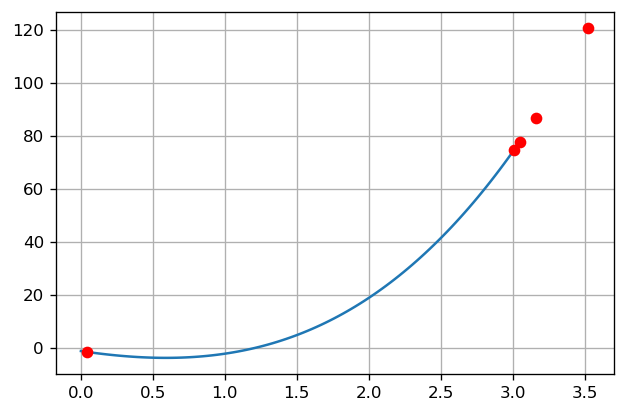

,a,b,x,f(x)
0,0.00,3.000000,0.040000,-1.311872
1,0.04,3.000000,3.012258,74.935035
2,0.04,3.012258,3.049229,77.797386
3,0.04,3.049229,3.162461,86.962658
4,0.04,3.162461,3.525505,120.580152


In [148]:
false_position(0, 3, 0.05, 5, f[3])